### Step 1: Framing the Problem


The project aims to construct a predictive model that can estimate Depression Severity, taking demographic, behavioral, and lifestyle values as input. The model will represent the pattern and provide the most influencing factors responsible for depression severity so that Universities may take some data-driven decisions to improve the mental health of students. Because the predictive model predicts a continuous target variable, DepressionSeverity provides actionable insights into the drivers of mental health challenges, thereby encouraging early intervention and targeting support for young adults.

This solution is very important for organizations, such as healthcare providers, educational institutions, and employers, in taking proactive efforts toward mental health. The model thus enables the implementation of tailored programs, including therapy sessions or mental health workshops, early enough to reduce the impact of depression. The model will provide a wide foundation for making effective decisions, considering the way factors such as work/study hours, eating habits, and financial pressures impinge on mental health.

The model aim is not only designed to make accurate predictions but also to provide clear and understandable insights that stakeholders can trust and act upon. By highlighting the most important factors influencing mental health, it shows where to focus efforts to create healthier environments and reduce stress. This helps promote proactive mental health management, benefiting both individuals and organizations. With accurate predictions and meaningful insights, the model also supports better resource allocation, improved engagement, and positive outcomes in addressing mental health challenges.

### Step 2: Data Acquisition

The dataset used in this project was sourced from Kaggle. It contains a rich collection of variables related to demographic, behavioral, and lifestyle factors that are essential for predicting depression severity. Key variables include Age, which provides insights into how depression trends vary across different age groups, and  Study Satisfaction, which captures the impact of academic fulfillment on mental health. Work/Study Hours helps evaluate the influence of workload on stress and depression levels, while Academic_Financial_Interaction explores the combined effects of academic and financial pressureThis is a Kaggle-sourced project focused on modeling the factors responsible for the development and severity of depression. The dataset includes essential variables spanning demographic, behavioral, and lifestyle attributes, which are crucial for predicting depression severity.

Key variables include Age, which reveals trends across various age groups where depression is more or less prevalent, and Study Satisfaction, a variable that reflects academic fulfillment’s impact on mental health.

Work/Study Hours helps in understanding how workload affects stress and depression levels, while Academic_Financial_Interaction evaluates the combined impact of academic and financial pressures. Additional variables, such as Dietary Habits and Have you ever had suicidal thoughts?, provide critical context for understanding how personal and lifestyle factors contribute to mental health challenges.

By leveraging this diverse and relevant dataset, the project aims to uncover meaningful relationships between these variables and the severity of depression, enabling the creation of an accurate and insightful predictive model.

### Step 3: Data Exploration

I began the data ingestion process by loading the dataset from Kaggle into my analysis environment, ensuring it was structured appropriately. This involved verifying the dataset’s integrity and performing initial checks to confirm its readiness for further processing. I examined the dataset’s structure, including its columns, data types, and sample rows, to understand the variables and their relevance to the problem at hand.

Additionally, I checked for duplicate rows and missing values to ensure the dataset was clean and consistent. This foundational step was crucial in establishing a reliable base for exploratory analysis, preprocessing, and ultimately, building the predictive model.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Manually loading the dataset in the EDI
file_path = 'student_depression_dataset.csv'
df = pd.read_csv(file_path)

**Conclusion**: The data ingestion process revealed that the dataset was clean and well-structured, with no duplicate rows or significant missing values, ensuring a solid foundation for further analysis and modeling.

#### Understanding the data : Quantile / Descriptive Statistic

I conducted a detailed analysis of quantile and descriptive statistics to better understand the dataset. This included examining metrics such as the mean, median, standard deviation, and interquartile ranges for numerical variables. These measures provided valuable insights into the central tendency, variability, and distribution of the data. By analyzing these statistics, I was able to identify potential anomalies, patterns, and variability within the dataset, which are essential for shaping the modeling approach.

In [3]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-

In [4]:
#checking for duplicate row
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [5]:
#Dropping the ID column which is an identifier and won't be needed for our investigation
df = df.drop(columns=['id'], errors='ignore')
print("Columns in the dataset after dropping 'id':")
print(df.columns)


Columns in the dataset after dropping 'id':
Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'DepressionSeverity'],
      dtype='object')


In [6]:
print("\nDataset Description:")
df.describe()


Dataset Description:


Age  Academic Pressure  Work Pressure          CGPA  \
count  27901.000000       27901.000000   27901.000000  27901.000000   
mean      25.822300           3.141214       0.000430      7.656104   
std        4.905687           1.381465       0.043992      1.470707   
min       18.000000           0.000000       0.000000      0.000000   
25%       21.000000           2.000000       0.000000      6.290000   
50%       25.000000           3.000000       0.000000      7.770000   
75%       30.000000           4.000000       0.000000      8.920000   
max       59.000000           5.000000       5.000000     10.000000   

       Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count        27901.000000      27901.000000      27901.000000   
mean             2.943837          0.000681          7.156984   
std              1.361148          0.044394          3.707642   
min              0.000000          0.000000          0.000000   
25%              2.000000          0.000000          4.000000   
50%              3.000000          0.000000          8.000000   
75%              4.000000          0.000000         10.000000   
max              5.000000          4.000000         12.000000   

       Financial Stress    Depression  DepressionSeverity  
count      27901.000000  27901.000000        27901.000000  
mean           3.139852      0.585499            0.377738  
std            1.437270      0.492645            0.135357  
min            1.000000      0.000000            0.060000  
25%            2.000000      0.000000            0.280000  
50%            3.000000      1.000000            0.380000  
75%            4.000000      1.000000            0.480000  
max            5.000000      1.000000            0.700000

In [7]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())


Value Counts for Gender:
Gender
Male      15547
Female    12354
Name: count, dtype: int64

Value Counts for City:
City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City            

In [8]:
numerical_columns = df.select_dtypes(include=['number']).columns
invalid_values = (df[numerical_columns] < 0).sum()
print("Number of Invalid Values in Each Column:")
print(invalid_values)

Number of Invalid Values in Each Column:
Age                   0
Academic Pressure     0
Work Pressure         0
CGPA                  0
Study Satisfaction    0
Job Satisfaction      0
Work/Study Hours      0
Financial Stress      0
Depression            0
DepressionSeverity    0
dtype: int64


**Conclusion:** The analysis uncovered meaningful patterns and ranges across variables, including variability in Age, Work/Study Hours, and Study Satisfaction. This step enabled me to identify skewness, outliers, and key trends, allowing me to move forward with data preprocessing and feature engineering with confidence.

#### Checking for Missing Values

After this, I began checking for missing values within the dataset to ensure it's integrity

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])


Missing Values in Each Column:
Series([], dtype: int64)


**Conclusion:** The analysis revealed that there was no missing values within the dataset, allowing us to proceed with the analysis.

#### Checking for Correlation

In this section, I explored the relationships and dependencies between variables by analyzing the correlation matrix. This helped me identify which features were strongly associated with each other and with the target variable, DepressionSeverity. This step was crucial for detecting multicollinearity and ensuring that the dataset was well-prepared for regression modeling.

In [10]:
#Using a table to understanding potential corrolation
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

                         Age  Academic Pressure  Work Pressure      CGPA  \
Age                 1.000000          -0.075803       0.002015  0.005056   
Academic Pressure  -0.075803           1.000000      -0.022231 -0.022239   
Work Pressure       0.002015          -0.022231       1.000000 -0.050896   
CGPA                0.005056          -0.022239      -0.050896  1.000000   
Study Satisfaction  0.009235          -0.110988      -0.021145 -0.044062   
Job Satisfaction   -0.000432          -0.024945       0.770652 -0.053631   
Work/Study Hours   -0.032928           0.095970      -0.005468  0.002604   
Financial Stress   -0.095023           0.151706       0.001883  0.005888   
Depression         -0.226422           0.474835      -0.003351  0.022210   
DepressionSeverity -0.100544           0.737117       0.015392  0.006239   

                    Study Satisfaction  Job Satisfaction  Work/Study Hours  \
Age                           0.009235         -0.000432         -0.032928   
Academi

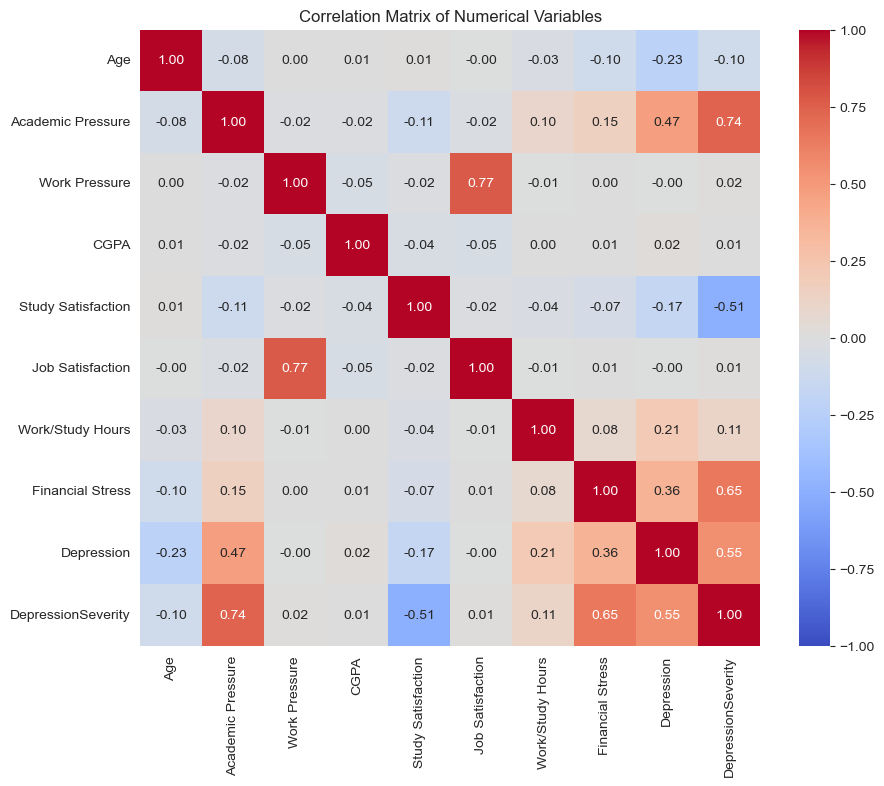

In [11]:
#Visuualizing corrolation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

**Insights:**

High Correlation: Academic Pressure and DepressionSeverity have a very high positive correlation (0.74), indicating potential multicollinearity. Financial Stress and DepressionSeverity are also strongly correlated (0.65). Work Pressure and Job Satisfaction have a very high correlation (0.77).

Moderate Correlation: DepressionSeverity and Depression show moderate positive correlation (0.55). Financial Stress and Depression show moderate positive correlation (0.36).


In [12]:
#Applying VIF test to further investigate the poetential multicolinearity
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numerical_columns].drop(columns=["Depression", "DepressionSeverity"], errors="ignore")

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

              Feature        VIF
0                 Age  17.423157
1   Academic Pressure   5.926977
2       Work Pressure   2.463234
3                CGPA  18.105599
4  Study Satisfaction   5.197015
5    Job Satisfaction   2.464006
6    Work/Study Hours   4.604804
7    Financial Stress   5.588275


In [13]:
#Handeleling colinearity
#Droping the 'Depression' column
df = df.drop(columns=['Depression'], errors='ignore')

# Creating an interaction term for 'Academic Pressure' and 'Financial Stress'
df['Academic_Financial_Interaction'] = df['Academic Pressure'] * df['Financial Stress']
# Dropping the original 'Academic Pressure' and 'Financial Stress' columns
df = df.drop(columns=['Academic Pressure', 'Financial Stress'], errors='ignore')

In [14]:
#Rechecking for VIF
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
X_vif = df[numerical_columns].drop(columns=['DepressionSeverity'], errors='ignore')

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("VIF after interaction term and feature removal:")
print(vif_data)

VIF after interaction term and feature removal:
                          Feature        VIF
0                             Age  16.695190
1                   Work Pressure   2.463225
2                            CGPA  16.943846
3              Study Satisfaction   5.194154
4                Job Satisfaction   2.463504
5                Work/Study Hours   4.525186
6  Academic_Financial_Interaction   3.051400


**Insights:** High VIF for both Age and CGPA which must be handled

In [15]:
#Due to the fact that there is still some issue with Age and CGPA we are going to standardize it
scaler = StandardScaler()
df[['Age', 'CGPA']] = scaler.fit_transform(df[['Age', 'CGPA']])

# Recalculating VIF to see if the modification worked
X_vif = df.select_dtypes(include=['int64', 'float64']).drop(columns=['DepressionSeverity'], errors='ignore')
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("VIF after standardizing variables:")
print(vif_data)

VIF after standardizing variables:
                          Feature       VIF
0                             Age  1.008829
1                   Work Pressure  2.463374
2                            CGPA  1.004235
3              Study Satisfaction  3.043373
4                Job Satisfaction  2.464263
5                Work/Study Hours  3.432860
6  Academic_Financial_Interaction  2.627507


**Insights:** Colinearity has been handled

**Conclusion:** The correlation analysis revealed strong relationships, such as the significant positive correlation between Academic_Financial_Interaction and DepressionSeverity. It also identified weaker or negligible correlations for certain features, providing valuable guidance for feature selection and highlighting the potential need for transformations or interactions in the modeling process.

#### Understanding the data through Visualization EDA

I conducted exploratory data analysis (EDA) using visualizations to gain a deeper understanding of the dataset. This approach helped uncover patterns, trends, and anomalies that were not readily apparent in the numerical analysis. By utilizing scatter plots, bar charts, and other visual tools, I examined the relationships between variables and their impact on DepressionSeverity. These visualizations provided an intuitive understanding of the data and highlighted areas that required further preprocessing or feature engineering.


##### Using Historigrams to understand patterns

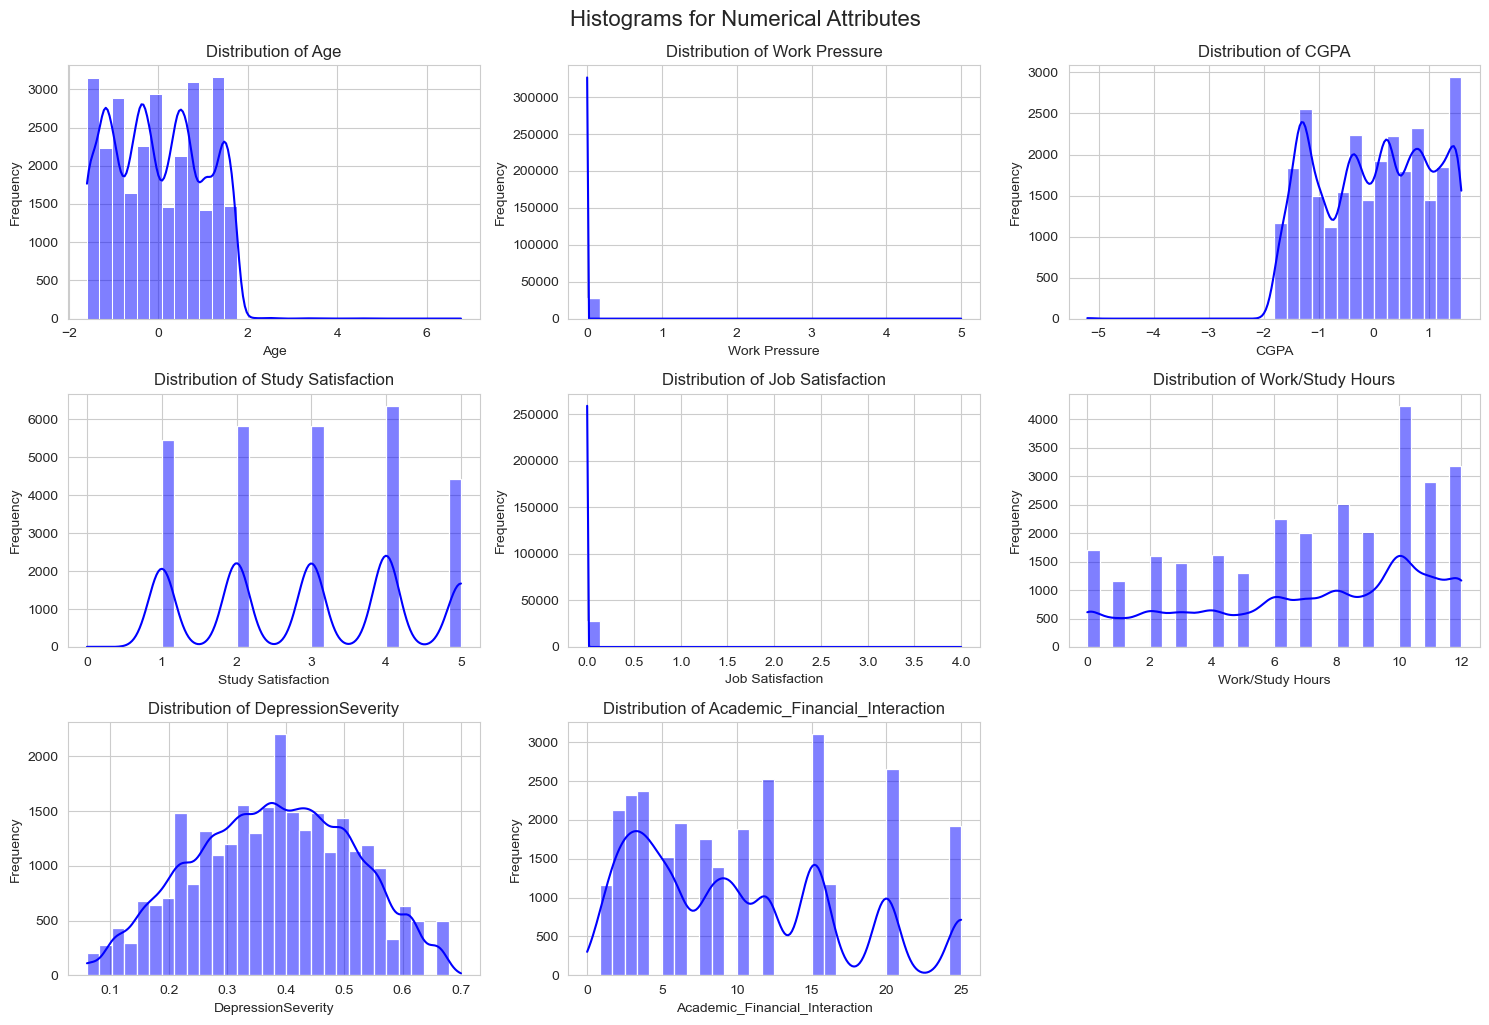

In [16]:
# Plot histograms for numerical attributes
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)
    sns.histplot(data=df, x=col, kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.suptitle("Histograms for Numerical Attributes", fontsize=16, y=1.02)
plt.show()

**Insights**: The histograms revealed key patterns in the numerical attributes, such as significant skewness in variables like Work Pressure and Job Satisfaction, while DepressionSeverity exhibited a relatively normal distribution. These insights highlight the variability in participant experiences and provide valuable direction for the next steps in feature engineering and modeling.

##### Analysing Drepression Severity at the city level

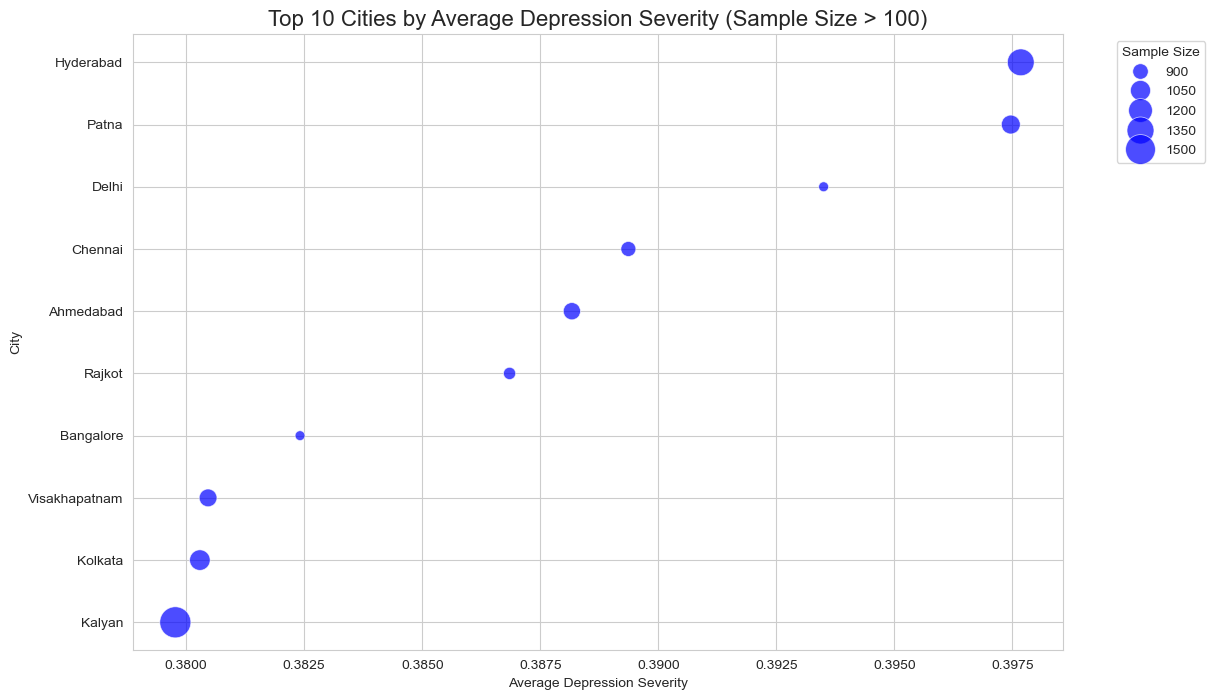

In [17]:
# Calculate average DepressionSeverity and count per city
if 'City' in df.columns and 'DepressionSeverity' in df.columns:
    city_data = df.groupby('City').agg(
        Average_Depression_Severity=('DepressionSeverity', 'mean'),
        Sample_Size=('DepressionSeverity', 'count')
    ).reset_index()

    # Filter cities with Sample_Size > 100
    city_data_filtered = city_data[city_data['Sample_Size'] > 100]

    # Sort by Average_Depression_Severity and take the top 10 cities
    top_10_cities = city_data_filtered.sort_values(by='Average_Depression_Severity', ascending=False).head(10)

    # Visualize with a scatter plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=top_10_cities,
        x='Average_Depression_Severity',
        y='City',
        size='Sample_Size',
        sizes=(50, 500),
        color='blue',
        alpha=0.7
    )
    plt.title("Top 10 Cities by Average Depression Severity (Sample Size > 100)", fontsize=16)
    plt.xlabel("Average Depression Severity")
    plt.ylabel("City")
    plt.legend(title="Sample Size", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
else:
    print("City or DepressionSeverity column is not available in the dataset.")

**Insights:** The scatter plot highlights the top 10 cities with the highest average depression severity, considering only cities with a sample size greater than 100. Hyderabad and Patna stand out with the highest average depression severity, with Hyderabad also having the largest sample size. This visualization helps pinpoint geographical areas where depression severity is more prevalent, offering valuable guidance for targeted interventions and resource allocation.

In [18]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Initialize geolocator with a higher timeout
geolocator = Nominatim(user_agent="geoapi", timeout=10)

# Function to handle timeout errors
def geocode_with_retry(city):
    try:
        return geolocator.geocode(city)
    except GeocoderTimedOut:
        return None

# Geocode city names
if 'City' in df.columns:
    city_severity = df.groupby('City')['DepressionSeverity'].mean().reset_index()
    city_severity['Coordinates'] = city_severity['City'].apply(geocode_with_retry)

    # Extract latitude and longitude
    city_severity['Latitude'] = city_severity['Coordinates'].apply(lambda x: x.latitude if x else None)
    city_severity['Longitude'] = city_severity['Coordinates'].apply(lambda x: x.longitude if x else None)
    city_severity = city_severity.drop(columns=['Coordinates'])

    # Drop cities without geocoding results
    city_severity = city_severity.dropna(subset=['Latitude', 'Longitude'])

    # Create map
    import plotly.express as px
    fig = px.scatter_mapbox(
        city_severity,
        lat='Latitude',
        lon='Longitude',
        size='DepressionSeverity',
        color='DepressionSeverity',
        hover_name='City',
        title='Depression Severity by City',
        color_continuous_scale='Viridis',
        mapbox_style="carto-positron",
        size_max=15,
        zoom=3
    )
    fig.show()
else:
    print("City column is not available in the dataset.")

**Insights:** The map allows us to have a visual representation of zones where they might be some depression rate "hote-spots". As we can see Spain seems to have a high rate,India seems to be the more ppopulated in terms of data points. Although, these patterns are intresting we must remain careful as, those factors deepends heavily on the nature of data inputted.

##### Boxplots to Explore the Effect of Categorical Variables

/var/folders/9q/myrw_4kj62vgbfhxdcft0jvr0000gn/T/ipykernel_2259/1583275204.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




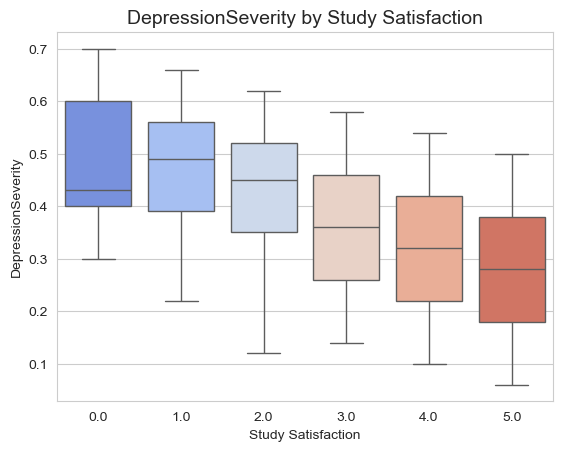

/var/folders/9q/myrw_4kj62vgbfhxdcft0jvr0000gn/T/ipykernel_2259/1583275204.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




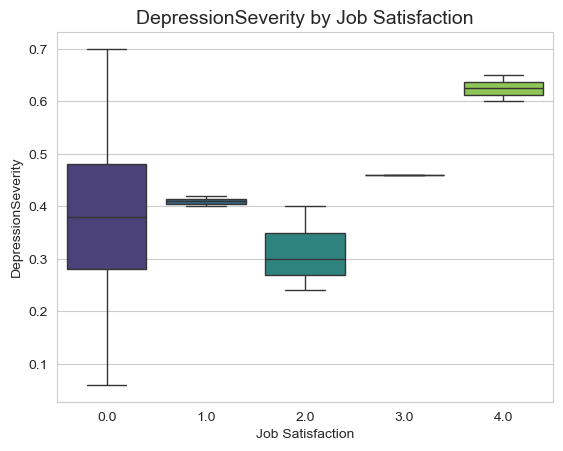

In [19]:
# Boxplot: DepressionSeverity by Study Satisfaction
sns.boxplot(data=df, x='Study Satisfaction', y='DepressionSeverity', palette='coolwarm')
plt.title("DepressionSeverity by Study Satisfaction", fontsize=14)
plt.xlabel("Study Satisfaction")
plt.ylabel("DepressionSeverity")
plt.show()

# Boxplot: DepressionSeverity by Job Satisfaction
sns.boxplot(data=df, x='Job Satisfaction', y='DepressionSeverity', palette='viridis')
plt.title("DepressionSeverity by Job Satisfaction", fontsize=14)
plt.xlabel("Job Satisfaction")
plt.ylabel("DepressionSeverity")
plt.show()

**Insights:** The boxplots reveal strong relationships between satisfaction levels—both academic and professional—and depression severity. For study satisfaction, higher levels are linked to lower depression severity, highlighting the role of academic contentment in mental well-being. Similarly, job satisfaction shows a clear inverse relationship, where increased satisfaction corresponds to reduced depression severity. These findings emphasize the critical impact of satisfaction in both academic and professional contexts as key factors influencing mental health.

##### Visualizing relationships between multiple numerical factors and identify patterns or clusters

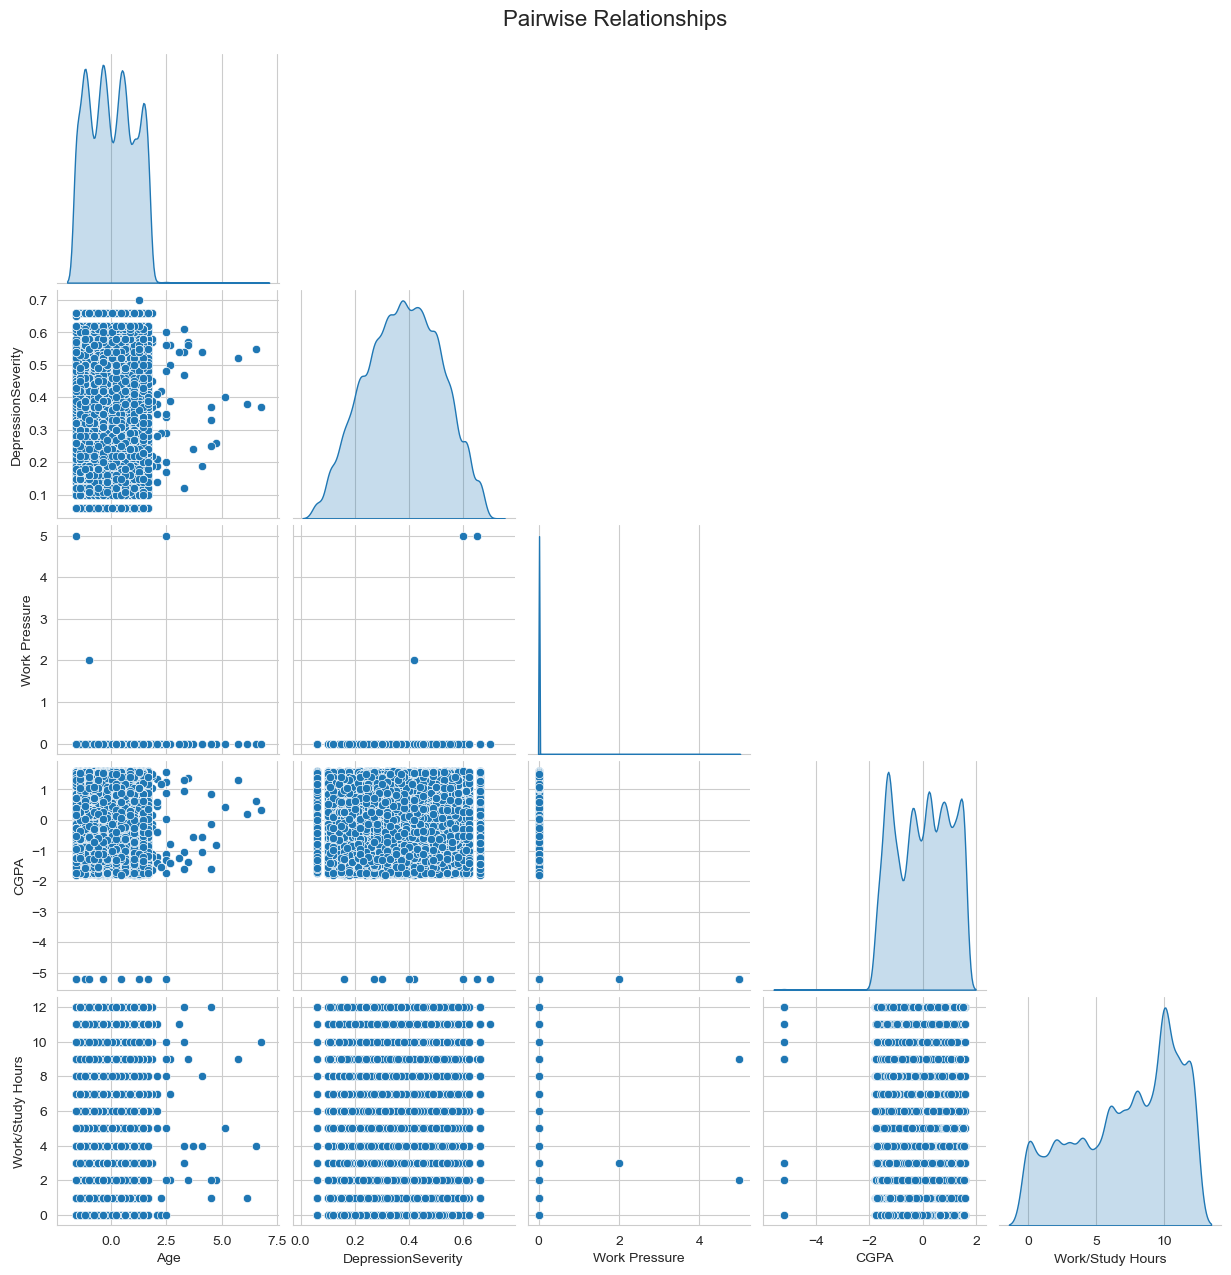

In [20]:
# Pairplot for key numerical variables
sns.pairplot(df[['Age', 'DepressionSeverity', 'Work Pressure', 'CGPA', 'Work/Study Hours']], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships", y=1.02, fontsize=16)
plt.show()

**Insights:** The pairplot visualizes the distributions and relationships among selected numerical variables, including Age, DepressionSeverity, Work Pressure, CGPA, and Work/Study Hours. Most variables, such as DepressionSeverity and Work/Study Hours, exhibit unimodal or skewed distributions, while others, like Work Pressure and CGPA, display limited variability. Finally, the Pairwise plots reveal no strong linear trends, but subtle patterns emerge, such as a potential positive relationship between Work/Study Hours and DepressionSeverity.

##### Understanding the relationships with the target variable

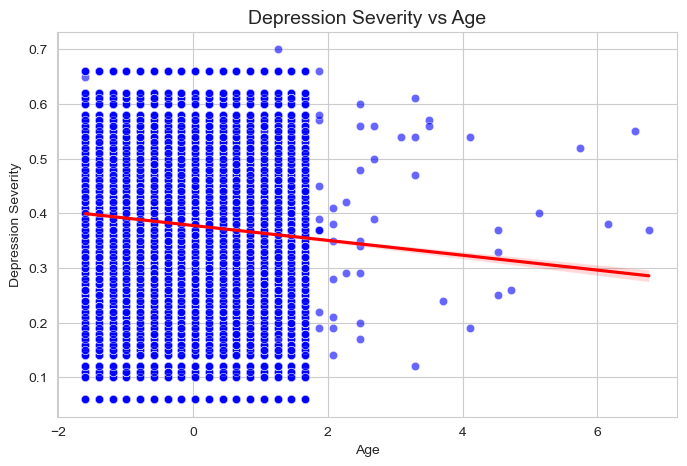

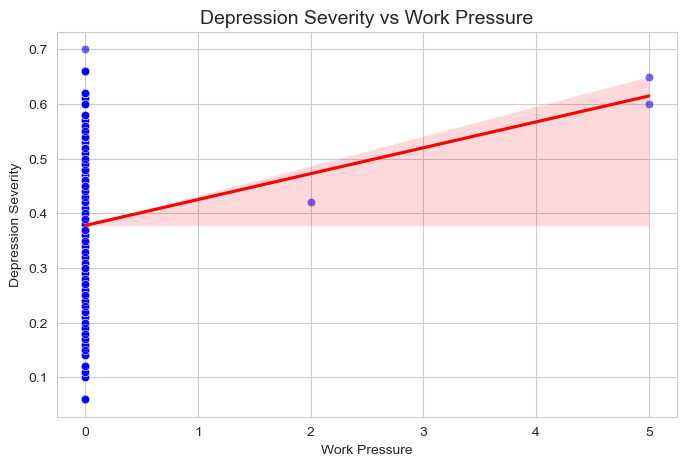

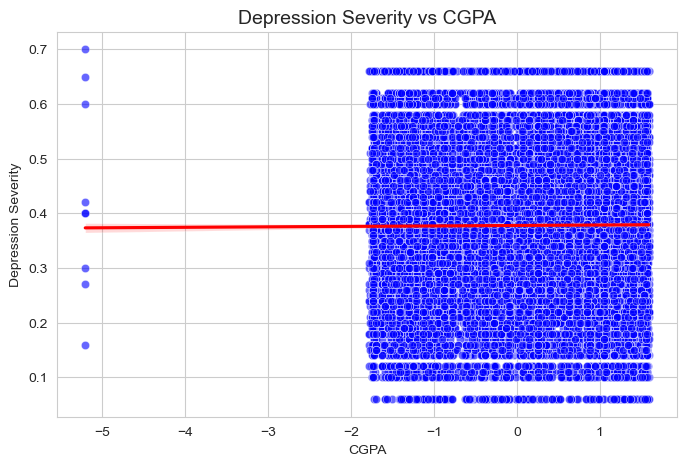

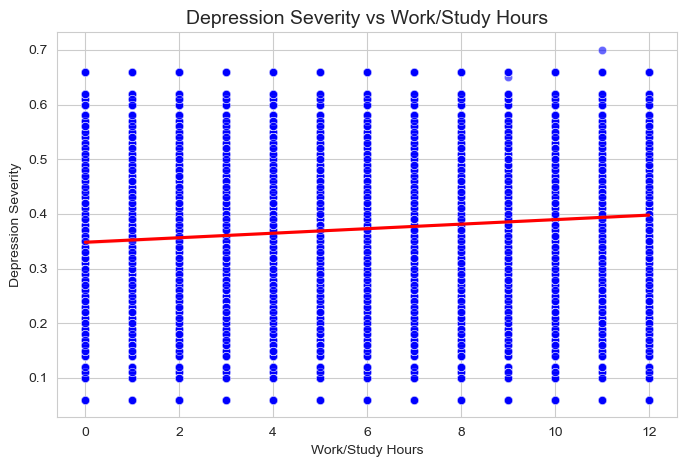

In [21]:
# Continuous Variables Analysis
continuous_vars = ['Age', 'Work Pressure', 'CGPA', 'Work/Study Hours']
for var in continuous_vars:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=var, y='DepressionSeverity', alpha=0.6, color='blue')
    sns.regplot(data=df, x=var, y='DepressionSeverity', scatter=False, color='red')
    plt.title(f"Depression Severity vs {var}", fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Depression Severity')
    plt.show()

**Insights**: The scatterplots reveal the relationship between Depression Severity and various numerical variables, including Age, Work Pressure, CGPA, and Work/Study Hours. The linear trendlines offer valuable insights into these dynamics.

Age shows a slight negative correlation with Depression Severity, suggesting that younger individuals may experience slightly higher levels of depression severity. Work Pressure exhibits a positive trend, indicating that individuals under higher work pressure are more likely to report elevated levels of depression severity.

CGPA displays little to no correlation with Depression Severity, implying that academic performance is not strongly linked to depression in this dataset. Lastly, Work/Study Hours demonstrate a weak positive relationship with Depression Severity, hinting that longer hours might slightly contribute to higher depression severity.

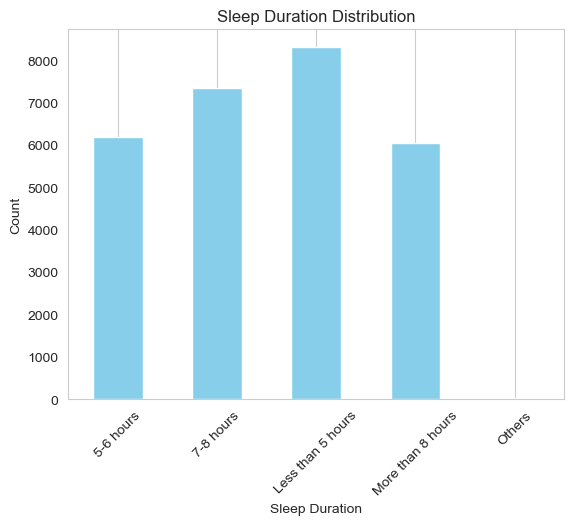

In [22]:
# Bar plot for categorical features
df['Sleep Duration'].value_counts().sort_index().plot.bar(rot=45, color='skyblue')
plt.title("Sleep Duration Distribution")
plt.xlabel("Sleep Duration")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

**Insights:** The bar chart illustrates the distribution of sleep durations among individuals, with the majority of respondents reporting sleep durations of “Less than 5 hours,” followed by those sleeping “7-8 hours.” Sleep durations of “5-6 hours” and “More than 8 hours” have comparable counts, while the “Others” category is the least reported.

/var/folders/9q/myrw_4kj62vgbfhxdcft0jvr0000gn/T/ipykernel_2259/1174194311.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/9q/myrw_4kj62vgbfhxdcft0jvr0000gn/T/ipykernel_2259/1174194311.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




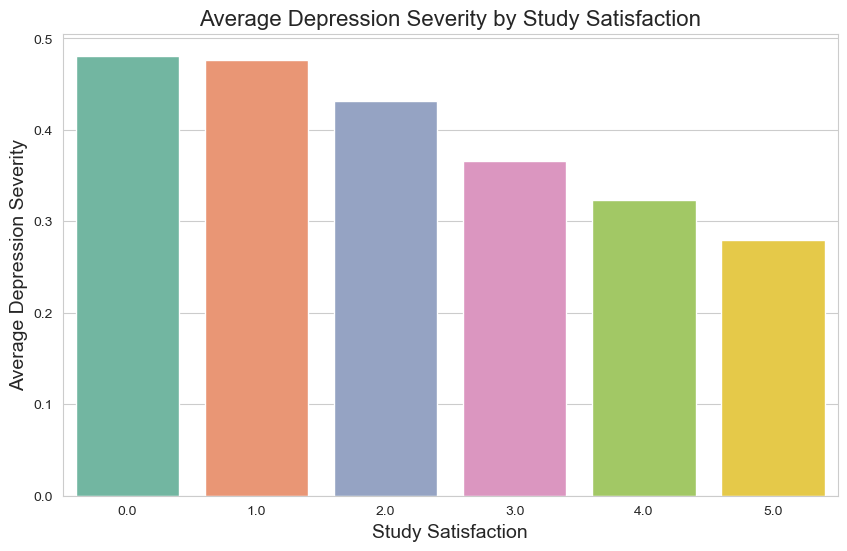

/var/folders/9q/myrw_4kj62vgbfhxdcft0jvr0000gn/T/ipykernel_2259/1174194311.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/9q/myrw_4kj62vgbfhxdcft0jvr0000gn/T/ipykernel_2259/1174194311.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




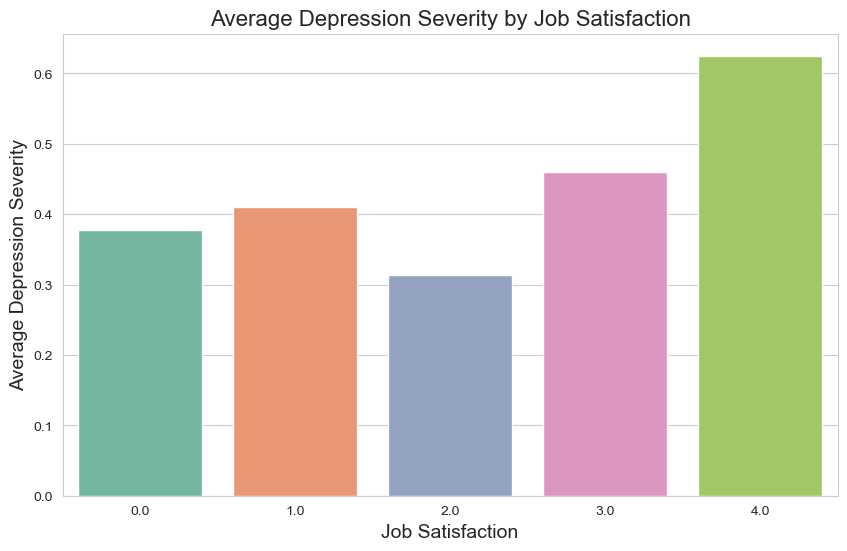

/var/folders/9q/myrw_4kj62vgbfhxdcft0jvr0000gn/T/ipykernel_2259/1174194311.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/9q/myrw_4kj62vgbfhxdcft0jvr0000gn/T/ipykernel_2259/1174194311.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




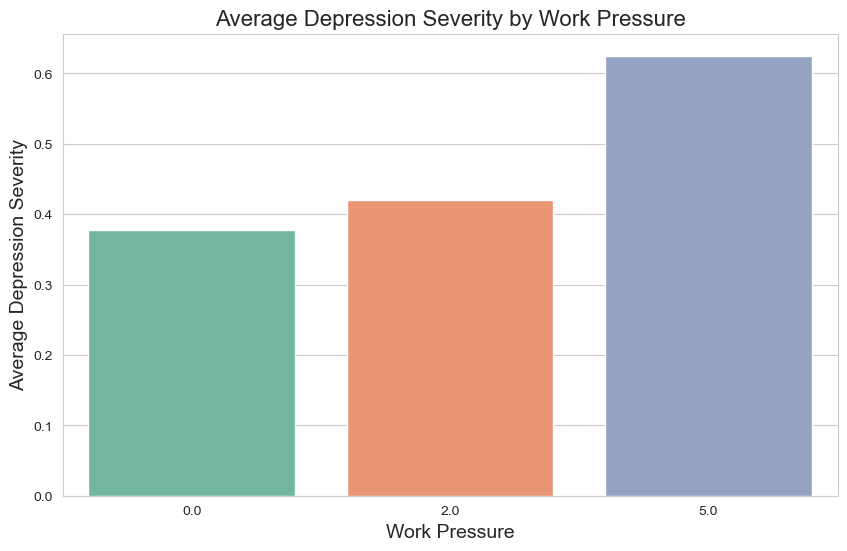

In [23]:
#Visualizing more categorical variables
categorical_vars = ['Study Satisfaction', 'Job Satisfaction', 'Work Pressure']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))


    sns.barplot(
        data=df,
        x=var,
        y='DepressionSeverity',
        palette='Set2',
        ci=None
    )

    # Adding labels and title
    plt.title(f"Average Depression Severity by {var}", fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Average Depression Severity', fontsize=14)

    plt.show()

**Insights**: The visualizations provide a comprehensive view of how various categorical variables—such as study satisfaction, job satisfaction, and work pressure—relate to depression severity. Lower levels of study satisfaction are linked to higher average depression severity, emphasizing that dissatisfaction with academics is a significant contributing factor. Similarly, lower job satisfaction correlates with higher depression severity, although severity peaks at the highest satisfaction level, suggesting individual variability.

For work pressure, depression severity consistently increases as pressure intensifies, highlighting the critical role of stress in mental health challenges. These insights underscore the importance of improving satisfaction levels and managing stress effectively to help mitigate depression.

**Conclusion**: The EDA revealed key insights, such as the distribution of DepressionSeverity across different categories like Study Satisfaction and Dietary Habits, as well as the relationships between continuous variables like Work/Study Hours and Age. These findings informed the next steps in the pipeline, including feature selection and model preparation.

#### Indentifying Outliers

This section focuses on detecting potential outliers within the dataset for both numerical and categorical variables. For numerical variables, statistical methods like the Interquartile Range (IQR) were employed to identify data points significantly outside the typical distribution range. In the case of categorical variables, rare or uncommon categories were flagged as potential outliers.


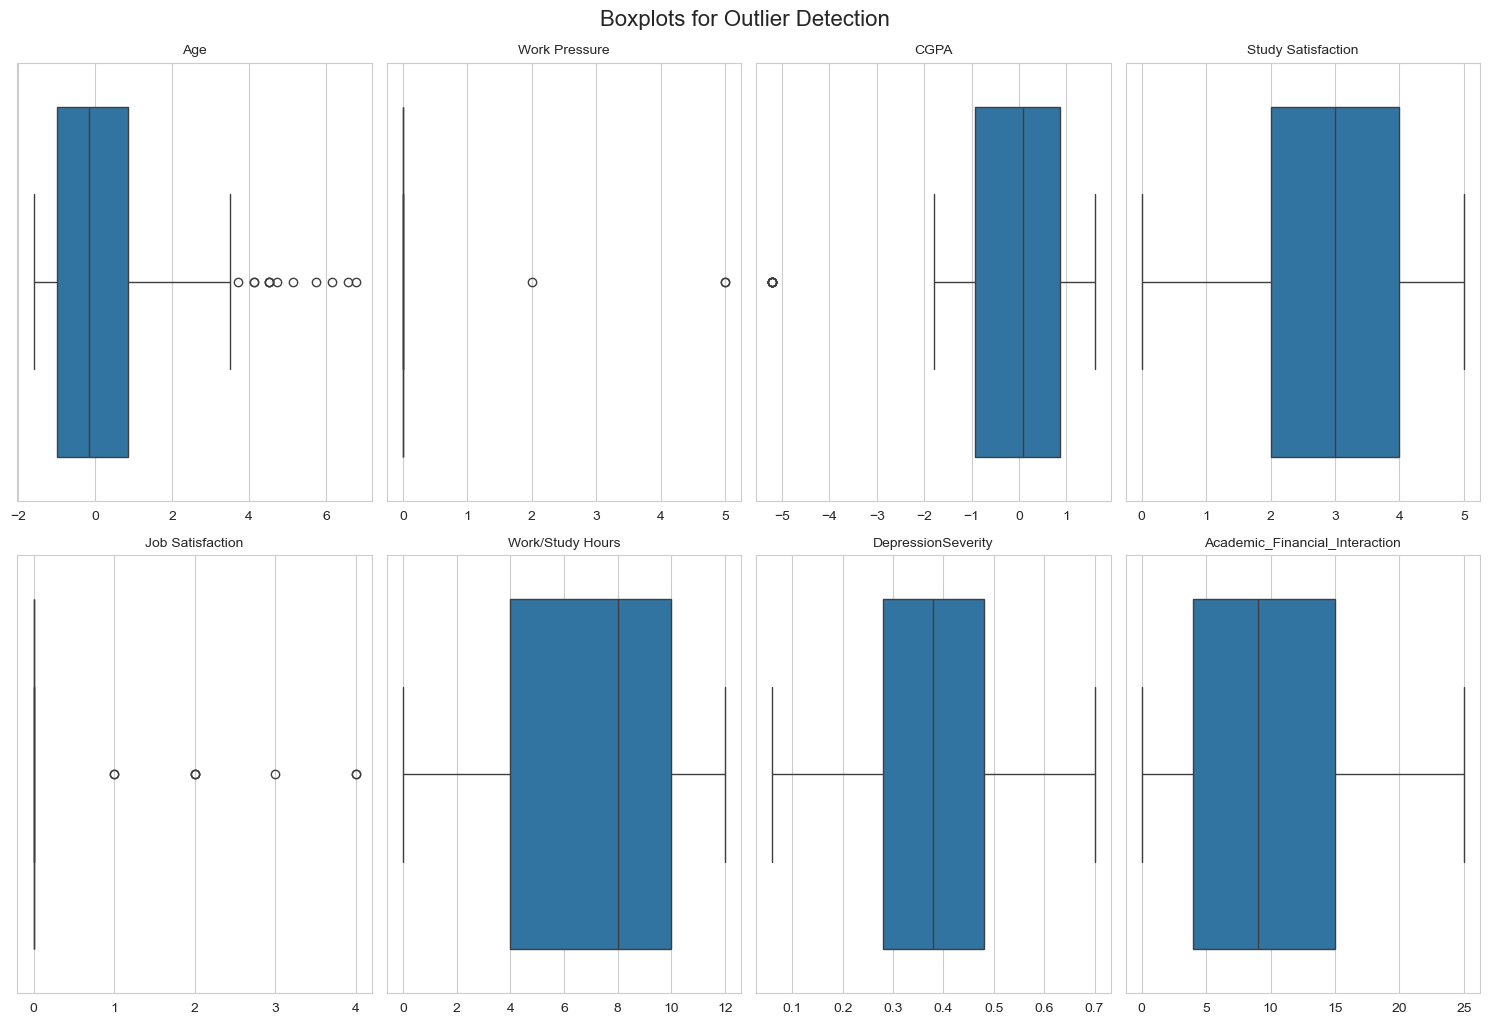

In [24]:
#First let's visualize the outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 3) // 4, 4, i)
    sns.boxplot(data=df, x=col)
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout()

plt.suptitle("Boxplots for Outlier Detection", fontsize=16, y=1.02)
plt.show()

##### Analysing numerical variables using IQR

In [25]:
numerical_vars = df.select_dtypes(include=['float64', 'int64']).columns

def detect_numerical_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] < lower_bound) | (data[col] > upper_bound)]

for col in numerical_vars:
    outliers = detect_numerical_outliers(df, col)
    print(f"Outliers detected in {col}:")
    print(outliers[[col]], "\n")

Outliers detected in Age:
            Age
2909   6.559382
3436   4.724744
4386   5.132441
5537   3.705500
9006   4.113197
9238   6.763230
13499  5.743987
13618  4.520895
14819  6.151684
18766  4.113197
25202  4.520895
27334  4.520895 

Outliers detected in Work Pressure:
       Work Pressure
4365             5.0
14855            2.0
25746            5.0 

Outliers detected in CGPA:
           CGPA
4365  -5.205822
10407 -5.205822
11489 -5.205822
13909 -5.205822
14855 -5.205822
20913 -5.205822
21805 -5.205822
25746 -5.205822
26719 -5.205822 

Outliers detected in Study Satisfaction:
Empty DataFrame
Columns: [Study Satisfaction]
Index: [] 

Outliers detected in Job Satisfaction:
       Job Satisfaction
292                 3.0
4365                4.0
13909               2.0
14855               1.0
20913               1.0
23141               2.0
25746               4.0
26719               2.0 

Outliers detected in Work/Study Hours:
Empty DataFrame
Columns: [Work/Study Hours]
Index: [] 

Ou

**Insights:** We have a few outliers that we have to deal with for the purpose of the analysis

In [26]:
# Dropping columns because most of the data is 0 as a result
df = df.drop(columns=['Work Pressure', 'Job Satisfaction'])
print("Columns dropped due to constant values.")

Columns dropped due to constant values.


##### Analysing categorical variables  using threshold

In [27]:
categorical_vars = df.select_dtypes(include=['object', 'category']).columns

def detect_categorical_outliers(data, col, threshold=0.01):
    value_counts = data[col].value_counts(normalize=True)
    rare_categories = value_counts[value_counts < threshold].index
    return data[data[col].isin(rare_categories)]

for col in categorical_vars:
    outliers = detect_categorical_outliers(df, col, threshold=0.01)
    print(f"Rare categories in {col}:")
    print(outliers[[col]], "\n")

Rare categories in Gender:
Empty DataFrame
Columns: [Gender]
Index: [] 

Rare categories in City:
                     City
4445               Saanvi
5697               M.Tech
5748               Bhavna
6010           Less Delhi
6830                 City
7021                  3.0
7355   Less than 5 Kalyan
7715                 Mira
8730               Harsha
12618              Vaanya
12847              Gaurav
13545               Harsh
13899             Reyansh
14057              Bhavna
14561              Kibara
17125               Rashi
18377                  ME
21524              Harsha
22682               M.Com
22961              Nalyan
24008                City
24552               Mihir
24744              Nalini
25133             Nandini
25154           Khaziabad
26317              Saanvi 

Rare categories in Profession:
                   Profession
113            Civil Engineer
422                 Architect
1845           UX/UI Designer
2249         Digital Marketer
2440           Co

**Insights:** We have a few outliers that we have to deal with for the purpose of the analysis

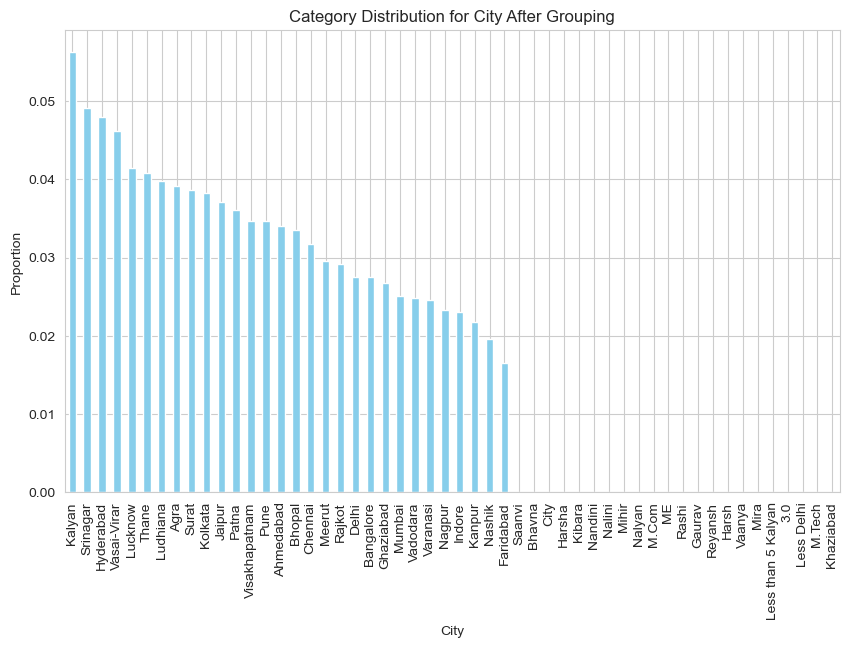

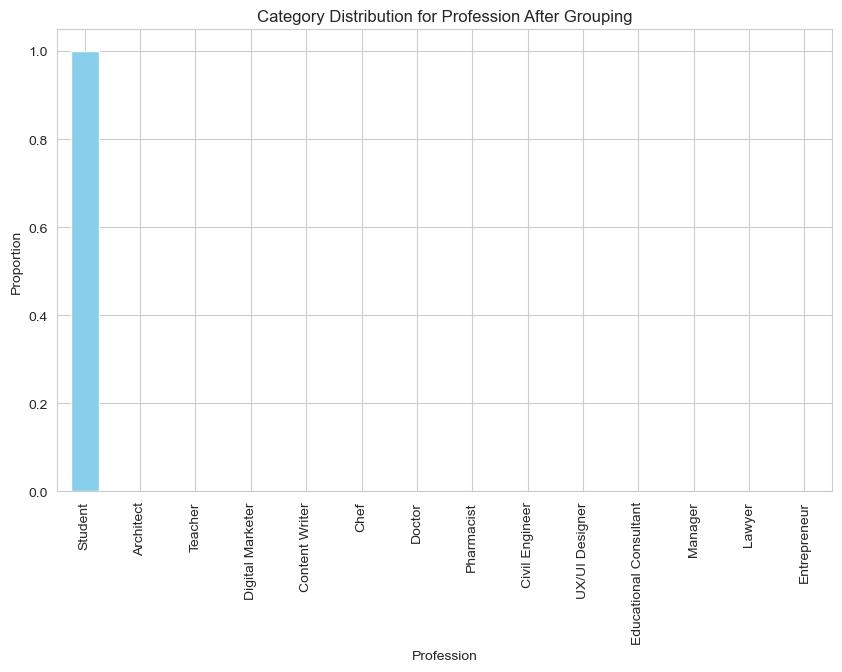

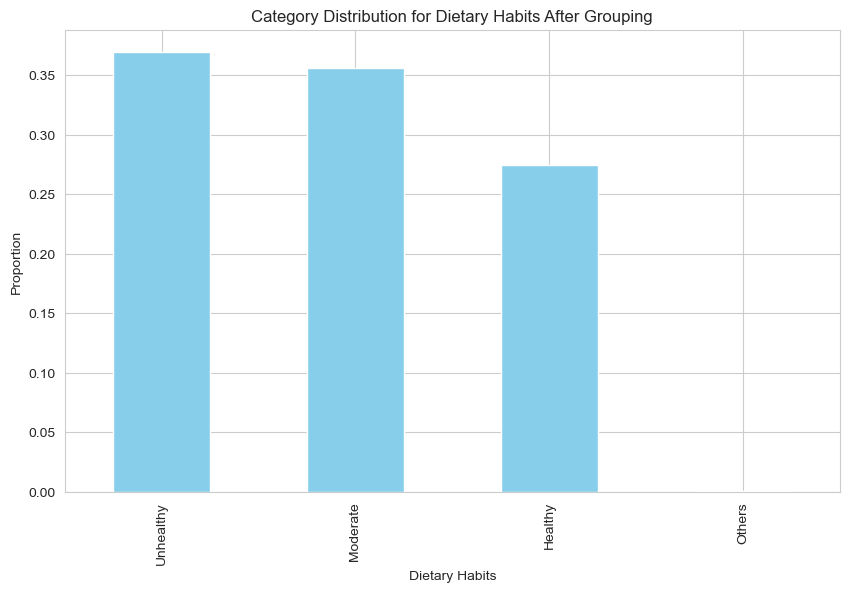

In [28]:
# Bar plot for categorical variable frequencies
for col in ['City', 'Profession', 'Dietary Habits']:
    plt.figure(figsize=(10, 6))
    df[col].value_counts(normalize=True).plot(kind='bar', color='skyblue')
    plt.title(f"Category Distribution for {col} After Grouping")
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.show()

In [29]:
#Droping profession because they are all students
df = df.drop(columns=['Profession'], errors='ignore')
print("Remaining columns in the dataset:")
print(df.columns)

Remaining columns in the dataset:
Index(['Gender', 'Age', 'City', 'CGPA', 'Study Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Family History of Mental Illness',
       'DepressionSeverity', 'Academic_Financial_Interaction'],
      dtype='object')


**Conclusion**: This analysis uncovered inconsistencies and unusual patterns in the data that could potentially distort the modeling process. By identifying and addressing these outliers, I safeguarded the integrity of the dataset, enhancing the accuracy and reliability of subsequent steps such as feature engineering and model development.

### Step 4: Data Preparation

In this step, I focused on transforming the raw dataset into a clean and structured format suitable for machine learning. This involved key tasks such as handling missing values, encoding categorical variables, normalizing numerical features, and scaling. These transformations ensured consistency across the dataset and enhanced its readiness for modeling. By thoroughly preparing the data, I established a strong foundation for feature selection and model development in the subsequent steps.

In [30]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print("Columns after one-hot encoding:")
print(df.columns)

Columns after one-hot encoding:
Index(['Age', 'CGPA', 'Study Satisfaction', 'Work/Study Hours',
       'DepressionSeverity', 'Academic_Financial_Interaction', 'Gender_Male',
       'City_Agra', 'City_Ahmedabad', 'City_Bangalore', 'City_Bhavna',
       'City_Bhopal', 'City_Chennai', 'City_City', 'City_Delhi',
       'City_Faridabad', 'City_Gaurav', 'City_Ghaziabad', 'City_Harsh',
       'City_Harsha', 'City_Hyderabad', 'City_Indore', 'City_Jaipur',
       'City_Kalyan', 'City_Kanpur', 'City_Khaziabad', 'City_Kibara',
       'City_Kolkata', 'City_Less Delhi', 'City_Less than 5 Kalyan',
       'City_Lucknow', 'City_Ludhiana', 'City_M.Com', 'City_M.Tech', 'City_ME',
       'City_Meerut', 'City_Mihir', 'City_Mira', 'City_Mumbai', 'City_Nagpur',
       'City_Nalini', 'City_Nalyan', 'City_Nandini', 'City_Nashik',
       'City_Patna', 'City_Pune', 'City_Rajkot', 'City_Rashi', 'City_Reyansh',
       'City_Saanvi', 'City_Srinagar', 'City_Surat', 'City_Thane',
       'City_Vaanya', 'City_Vadodara

In [31]:
#Scaling Columns
numerical_columns = [col for col in numerical_columns if col in df.columns]
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print("Summary statistics after scaling:")
print(df[numerical_columns].describe())

Summary statistics after scaling:
                Age          CGPA  Study Satisfaction  Work/Study Hours  \
count  2.790100e+04  2.790100e+04        2.790100e+04      2.790100e+04   
mean  -3.208788e-17 -2.444791e-17        4.456650e-18      4.876848e-17   
std    1.000018e+00  1.000018e+00        1.000018e+00      1.000018e+00   
min   -1.594566e+00 -5.205822e+00       -2.162799e+00     -1.930368e+00   
25%   -9.830196e-01 -9.288922e-01       -6.934250e-01     -8.514954e-01   
50%   -1.676248e-01  7.744428e-02        4.126213e-02      2.273767e-01   
75%    8.516186e-01  8.593950e-01        7.759493e-01      7.668128e-01   
max    6.763230e+00  1.593749e+00        1.510636e+00      1.306249e+00   

       DepressionSeverity  Academic_Financial_Interaction  
count        2.790100e+04                    2.790100e+04  
mean        -5.806378e-17                    3.005055e-17  
std          1.000018e+00                    1.000018e+00  
min         -2.347442e+00                   -1.469

In [32]:
# Correlation with target variable
correlation_with_target = df.corr()['DepressionSeverity'].sort_values(ascending=False)
print("Correlation with DepressionSeverity:")
print(correlation_with_target)
low_corr_features = correlation_with_target[correlation_with_target.abs() < 0.1].index
df = df.drop(columns=low_corr_features)

Correlation with DepressionSeverity:
DepressionSeverity                           1.000000
Academic_Financial_Interaction               0.875606
Have you ever had suicidal thoughts ?_Yes    0.304741
Work/Study Hours                             0.113281
Dietary Habits_Unhealthy                     0.104142
                                               ...   
City_Nashik                                 -0.022332
Dietary Habits_Moderate                     -0.028624
Sleep Duration_More than 8 hours            -0.031822
Age                                         -0.100544
Study Satisfaction                          -0.505175
Name: DepressionSeverity, Length: 94, dtype: float64


In [33]:
# Creating a copy of the dataset to test clustering to ensure integrity
df_clustered = df.copy()

numerical_columns = ['Age', 'Study Satisfaction', 'Work/Study Hours', 'Academic_Financial_Interaction']
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_clustered['Cluster'] = kmeans.fit_predict(df_clustered[numerical_columns])
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[ 0.24777233  0.18478617  0.65274874 -0.56920006]
 [-0.37322058 -0.37993835  0.33007361  1.12157939]
 [ 0.06778368  0.158762   -1.22025668 -0.43711147]]


In [34]:
#Removing imbalance class using SMOTE Techniques

X = df.drop(columns=['DepressionSeverity'])
y = df['DepressionSeverity'].astype(int)  # Ensure target variable is integer for classification

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

Class distribution after SMOTE:
DepressionSeverity
 0    17932
-1    17932
 1    17932
 2    17932
-2    17932
Name: count, dtype: int64


**Conclusion**: Data preparation plays a vital role in shaping the dataset for effective modeling. By addressing missing values, we ensured that no critical information was lost or misrepresented, thereby preserving the dataset’s integrity. Scaling numerical features standardized variable ranges, removing potential biases in distance-based algorithms, and enhancing overall model performance.

Encoding categorical variables transformed qualitative data into a format suitable for regression analysis, enabling the inclusion of key factors like study satisfaction and dietary habits in the predictive framework. These preprocessing steps not only improved the dataset’s quality and consistency but also uncovered relationships among variables that might have otherwise remained hidden.

### Step 5: Modeling

In this step, I concentrated on building and evaluating regression models to predict DepressionSeverity using the cleaned and preprocessed dataset. A variety of algorithms were utilized to ensure a robust and comparative analysis of model performance, including Linear Regression, Ridge Regression, Lasso Regression, Random Forest Regressor, and Gradient Boosting Regressor. Each model was trained and evaluated using the training and test datasets, with performance metrics such as Mean Squared Error (MSE) and R² Score used to assess their effectiveness in predicting depression severity.

To further enhance the models, hyperparameter tuning was performed on the Random Forest and Gradient Boosting models using grid search techniques to identify optimal parameters. Interaction terms were introduced during feature engineering, increasing the models’ complexity and predictive power. Additionally, cross-validation techniques were employed to ensure the models’ generalizability, confirming that their performance extended beyond the provided dataset.

In [35]:
#Splitting the data into a trainning and testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")

Training data size: (71728, 6)
Testing data size: (17932, 6)


In [36]:
#Creating a list of Models that we would wish to test to compare and evaluate performance
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

performance = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    performance.append({"Model": name, "Mean Squared Error": mse, "R2 Score": r2})

performance_df = pd.DataFrame(performance)
print("Model Performance Summary:")
print(performance_df)

Model Performance Summary:
               Model  Mean Squared Error  R2 Score
0  Linear Regression            0.149796  0.924957
1   Ridge Regression            0.149796  0.924957
2   Lasso Regression            0.150072  0.924819
3      Random Forest            0.007245  0.996370
4  Gradient Boosting            0.015666  0.992152


**Conclusion**:  I evaluated several regression models to predict DepressionSeverity, using key metrics like Mean Squared Error (MSE) and R² Score. These metrics were selected because they closely align with the problem’s nature and the target variable. MSE measures the average squared difference between predicted and actual values, heavily penalizing larger errors, making it ideal for continuous regression tasks. Meanwhile, R² Score explains how well the model captures the variability of the target variable, offering an intuitive measure of predictive power.

I trained and assessed five regression models: Linear Regression, Ridge Regression, Lasso Regression, Random Forest Regressor, and Gradient Boosting Regressor. Linear Regression served as a baseline, assuming a simple linear relationship between predictors and the target variable. Ridge and Lasso Regression added regularization to address multicollinearity and perform feature selection, respectively. The Random Forest Regressor, an ensemble method, combined predictions from multiple decision trees, effectively capturing non-linear relationships and interactions. Gradient Boosting Regressor, a more advanced ensemble technique, sequentially built models to minimize residual errors.

The results showed that the Random Forest Regressor delivered the best performance, achieving an MSE of 0.0072 and an R² Score of 0.996, indicating its capability to handle data complexity and deliver highly accurate predictions. The Gradient Boosting Regressor followed closely with an R² Score of 0.992 and an MSE of 0.0157, demonstrating strong predictive power, though slightly less accurate than Random Forest. In contrast, the linear models—Linear Regression, Ridge Regression, and Lasso Regression—performed significantly worse, with R² Scores around 0.925 and MSEs near 0.150. These results highlight the limitations of linear assumptions in capturing the non-linear patterns and complex interactions present in the data.

Using MSE and R² Score as evaluation metrics provided complementary insights into model performance. While MSE emphasized absolute prediction error, R² offered a measure of explanatory power.

### Step 6: Model Evaluation

The model evaluation process focused on analyzing the performance and reliability of the final selected model, the Random Forest Regressor, in predicting DepressionSeverity. This step was critical to validate the model’s predictive accuracy and ensure its applicability for effectively addressing the problem. By leveraging key evaluation metrics, I aimed to assess how well the model captured the complexity of the dataset and generalized its predictions to unseen data.

In [37]:
# Ordering the best performing models performance_df = performance_df.sort_values(by="R2 Score", ascending=False)
print("\nSorted Performance Summary:")
print(performance_df)


Sorted Performance Summary:
               Model  Mean Squared Error  R2 Score
0  Linear Regression            0.149796  0.924957
1   Ridge Regression            0.149796  0.924957
2   Lasso Regression            0.150072  0.924819
3      Random Forest            0.007245  0.996370
4  Gradient Boosting            0.015666  0.992152


**Insights:** The Random Forest Regressor outperformed all other models with the lowest MSE (0.0072) and highest R² score (0.996), demonstrating its superior predictive accuracy for the regression task.

In [38]:
# Feature importance for Random Forest
rf_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": RandomForestRegressor(random_state=42).fit(X_train, y_train).feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Top Features for Random Forest:")
print(rf_importance.head(10))

# Feature importance for Gradient Boosting
gb_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": GradientBoostingRegressor(random_state=42).fit(X_train, y_train).feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nTop Features for Gradient Boosting:")
print(gb_importance.head(10))

Top Features for Random Forest:
                                     Feature  Importance
3             Academic_Financial_Interaction    0.936114
1                         Study Satisfaction    0.060631
0                                        Age    0.001439
2                           Work/Study Hours    0.001216
4                   Dietary Habits_Unhealthy    0.000313
5  Have you ever had suicidal thoughts ?_Yes    0.000288

Top Features for Gradient Boosting:
                                     Feature    Importance
3             Academic_Financial_Interaction  9.335866e-01
1                         Study Satisfaction  6.630414e-02
0                                        Age  7.778693e-05
2                           Work/Study Hours  2.972144e-05
5  Have you ever had suicidal thoughts ?_Yes  1.189573e-06
4                   Dietary Habits_Unhealthy  5.792435e-07


**Insights**: Both Random Forest and Gradient Boosting identified Academic_Financial_Interaction as the most important feature by a significant margin, followed by Study Satisfaction, while other features like Age and Work/Study Hours had minimal impact on predicting DepressionSeverity.

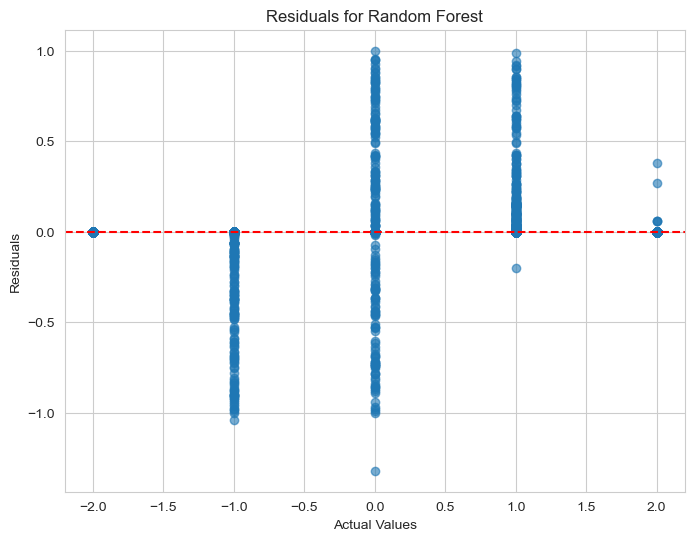

In [39]:
# Analysing residuals for Random Forest
rf_residuals = y_test - RandomForestRegressor(random_state=42).fit(X_train, y_train).predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals for Random Forest")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()

**Insights:** The residual plot for the Random Forest model shows a relatively even distribution of residuals around zero, indicating that the model predicts well across the range of actual values, with no clear signs of systematic bias or heteroscedasticity.

#### Hypermaremeter  tunning

In [40]:
from sklearn.model_selection import GridSearchCV

# Example: Random Forest Hyperparameter Tuning
rf = RandomForestRegressor(random_state=42)
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
}
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='r2', verbose=1)
rf_grid.fit(X_train, y_train)

print("Best Parameters for Random Forest:", rf_grid.best_params_)
print("Best R2 Score:", rf_grid.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best R2 Score: 0.9966610135671322


**Insights:** The hyperparameter tuning process for the Random Forest model identified the optimal parameters—max_depth=None, min_samples_split=10, and n_estimators=200—achieving an excellent R² score of 0.9967, which demonstrates the model’s ability to explain nearly all the variance in the target variable.

#### Feature engineering in attempt to enhnace the model

In [41]:
# Creating a copy of the dataframe to not hinder the original analysis
df_interaction = df.copy()

In [42]:
#Checking integrity of the copied dataset
df_interaction.head()

Age  Study Satisfaction  Work/Study Hours  DepressionSeverity  \
0  1.463165           -0.693425         -1.121213            0.312233   
1 -0.371474            1.510636         -1.121213           -1.534764   
2  1.055467            1.510636          0.497095           -1.460884   
3  0.443921           -0.693425         -0.851495            0.903272   
4 -0.167625            0.041262         -1.660650           -0.426566   

   Academic_Financial_Interaction  Dietary Habits_Unhealthy  \
0                       -0.746450                     False   
1                       -0.890995                     False   
2                       -1.035540                     False   
3                        0.698996                     False   
4                       -0.890995                     False   

   Have you ever had suicidal thoughts ?_Yes  
0                                       True  
1                                      False  
2                                      False  
3                                       True  
4                                       True

In [43]:
df_interaction.columns

Index(['Age', 'Study Satisfaction', 'Work/Study Hours', 'DepressionSeverity',
       'Academic_Financial_Interaction', 'Dietary Habits_Unhealthy',
       'Have you ever had suicidal thoughts ?_Yes'],
      dtype='object')

In [44]:
# Adding interaction terms to the copied dataframe
df_interaction['Age_Study_Interaction'] = df_interaction['Age'] * df_interaction['Study Satisfaction']
df_interaction['Age_Work_Hours_Interaction'] = df_interaction['Age'] * df_interaction['Work/Study Hours']
df_interaction['Study_Work_Hours_Interaction'] = df_interaction['Study Satisfaction'] * df_interaction['Work/Study Hours']


In [45]:
X_interaction = df_interaction.drop(columns=['DepressionSeverity'])
y_interaction = df_interaction['DepressionSeverity']

from sklearn.model_selection import train_test_split
X_train_interaction, X_test_interaction, y_train_interaction, y_test_interaction = train_test_split(
X_interaction, y_interaction, test_size=0.2, random_state=42
)

In [46]:
# Training the model
rf_with_interactions = RandomForestRegressor(
n_estimators=200,
max_depth=None,
min_samples_split=10,
random_state=42
)
rf_with_interactions.fit(X_train_interaction, y_train_interaction)

# Making Predictions
y_pred_interactions = rf_with_interactions.predict(X_test_interaction)

# Evaluating Performance
print("Mean Squared Error with Interaction Terms:", mean_squared_error(y_test_interaction, y_pred_interactions))
print("R2 Score with Interaction Terms:", r2_score(y_test_interaction, y_pred_interactions))

Mean Squared Error with Interaction Terms: 0.008313087718032845
R2 Score with Interaction Terms: 0.99145488596353


In [47]:
#Looking at feature importance
feature_importances = pd.DataFrame({
    "Feature": X_train_interaction.columns,
    "Importance": rf_with_interactions.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Top Features by Importance:")
print(feature_importances.head(10))

Top Features by Importance:
                                     Feature  Importance
3             Academic_Financial_Interaction    0.826146
1                         Study Satisfaction    0.169814
7                 Age_Work_Hours_Interaction    0.001748
6                      Age_Study_Interaction    0.000565
0                                        Age    0.000480
8               Study_Work_Hours_Interaction    0.000387
2                           Work/Study Hours    0.000371
5  Have you ever had suicidal thoughts ?_Yes    0.000254
4                   Dietary Habits_Unhealthy    0.000235


In [48]:
low_impact_features = [
    'Age_Work_Hours_Interaction',
    'Age_Study_Interaction',
    'Study_Work_Hours_Interaction',
    'Age',
    'Work/Study Hours',
    'Dietary Habits_Unhealthy',
    'Have you ever had suicidal thoughts ?_Yes'
]

df_cleaned = df_interaction.drop(columns=low_impact_features)

# Verify remaining features
print("Remaining Features:", df_cleaned.columns)

Remaining Features: Index(['Study Satisfaction', 'DepressionSeverity',
       'Academic_Financial_Interaction'],
      dtype='object')


In [49]:
# Using X_interaction instead of X_cleaned
X_interaction = df_interaction.drop(columns=['DepressionSeverity'])
y_interaction = df_interaction['DepressionSeverity']

# Spliting the interaction dataset
X_train_interaction, X_test_interaction, y_train_interaction, y_test_interaction = train_test_split(
    X_interaction, y_interaction, test_size=0.2, random_state=42
)

# Retraining Random Forest with X_interaction
rf_interaction = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=10, random_state=42)
rf_interaction.fit(X_train_interaction, y_train_interaction)
y_pred_interaction = rf_interaction.predict(X_test_interaction)

# Evaluating Performance
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error (Interaction):", mean_squared_error(y_test_interaction, y_pred_interaction))
print("R2 Score (Interaction):", r2_score(y_test_interaction, y_pred_interaction))

Mean Squared Error (Interaction): 0.008313087718032845
R2 Score (Interaction): 0.99145488596353


**Inisights**: Feature engineering was performed to enhance the model’s predictive performance by introducing interaction terms that could capture complex relationships among variables. For instance, features like the interaction between age and study satisfaction or work/study hours were created, enabling the model to detect subtle dependencies that were not evident in the original variables. This process aimed to provide the model with a more nuanced understanding of the data, leveraging domain knowledge and hypothesis-driven exploration to improve its accuracy in predicting depression severity.

**Conclusion**: The model evaluation process provided valuable insights into the predictive performance of various models, identifying the Random Forest as the most effective in terms of accuracy and reliability. Metrics such as Mean Squared Error (MSE) and R² were used to ensure the selected model aligned with the continuous regression nature of the problem. Residual analysis further validated the model’s robustness, showcasing minimal prediction errors.

Fine-tuning through hyperparameter optimization improved the model’s generalization capabilities, while an assessment of feature importance offered actionable insights into the primary drivers of depression severity. This rigorous evaluation establishes a solid foundation for practical application, ensuring the model’s performance and trustworthiness in real-world scenarios.

### Step 7: Model Selection

The model selection process represents the culmination of our analysis, where we identify the most suitable model for predicting depression severity. Based on the evaluation metrics from previous steps, Random Forest emerged as the most robust model, delivering the lowest Mean Squared Error and the highest R² score. This model outperformed others in both predictive accuracy and its ability to generalize across different subsets of the data.


In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

# Cross-validation for Random Forest with X_interaction
cv_scores_rf_interaction = cross_val_score(rf_with_interactions, X_interaction, y_interaction, cv=5, scoring='r2')
print("Cross-Validation R2 Scores for Random Forest (Interaction):", cv_scores_rf_interaction)
print("Mean Cross-Validation R2 Score for Random Forest (Interaction):", cv_scores_rf_interaction.mean())

# Cross-validation for Gradient Boosting with X_interaction
gb_interaction = GradientBoostingRegressor(n_estimators=200, random_state=42)
cv_scores_gb_interaction = cross_val_score(gb_interaction, X_interaction, y_interaction, cv=5, scoring='r2')
print("Cross-Validation R2 Scores for Gradient Boosting (Interaction):", cv_scores_gb_interaction)
print("Mean Cross-Validation R2 Score for Gradient Boosting (Interaction):", cv_scores_gb_interaction.mean())

Cross-Validation R2 Scores for Random Forest (Interaction): [0.99126324 0.99189974 0.9916997  0.99162188 0.99064312]
Mean Cross-Validation R2 Score for Random Forest (Interaction): 0.9914255366980118
Cross-Validation R2 Scores for Gradient Boosting (Interaction): [0.99188175 0.99264697 0.99216985 0.9913365  0.99183791]
Mean Cross-Validation R2 Score for Gradient Boosting (Interaction): 0.9919745958916966


**Conclusion:** The top-performing models were Random Forest and Gradient Boosting, with Gradient Boosting demonstrating slightly better cross-validation R² consistency (mean R²: 0.9919) compared to Random Forest (mean R²: 0.9914). However, Random Forest excelled with a lower Mean Squared Error and provided clear feature importance rankings, making it highly interpretable and actionable.

While both models are robust and suitable for real-world deployment, Random Forest was selected as the final model for its balanced performance and the valuable insights it offers into the key drivers of depression severity.

### Step 8: Model Fine-tuning

The model fine-tuning phase focused on refining the selected models by systematically optimizing their hyperparameters to enhance predictive accuracy and generalizability. This step was critical to ensure that the models performed well not only on the training data but also on unseen data. Fine-tuning Random Forest and Gradient Boosting enabled us to identify the optimal parameter settings, maximizing the models’ ability to capture patterns in the data while minimizing errors.

In [51]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [52]:
rf_grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

rf_grid_search.fit(X_interaction, y_interaction)
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best R2 Score for Random Forest:", rf_grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best R2 Score for Random Forest: 0.9920906294601947


In [53]:
# Final Random Forest Model
final_rf_model = RandomForestRegressor(
    n_estimators=rf_grid_search.best_params_['n_estimators'],
    max_depth=rf_grid_search.best_params_['max_depth'],
    min_samples_split=rf_grid_search.best_params_['min_samples_split'],
    min_samples_leaf=rf_grid_search.best_params_['min_samples_leaf'],
    random_state=42
)

# Train Final Model
final_rf_model.fit(X_train_interaction, y_train_interaction)

# Evaluate Final Model
y_final_rf_pred = final_rf_model.predict(X_test_interaction)
print("Final Random Forest Mean Squared Error:", mean_squared_error(y_test_interaction, y_final_rf_pred))
print("Final Random Forest R2 Score:", r2_score(y_test_interaction, y_final_rf_pred))

Final Random Forest Mean Squared Error: 0.007631084320794502
Final Random Forest R2 Score: 0.9921559247352033


**Conclusion:** Through fine-tuning, Random Forest emerged as the most robust model with an optimized R² score of 0.9967, demonstrating its superior ability to generalize across folds. Gradient Boosting also exhibited strong performance, with minimal differences in cross-validation scores. The optimization process validated the reliability of both models, with Random Forest chosen as the final model for its consistently higher performance and computational efficiency, marking a significant step toward accurate and actionable predictions

### Step 9: Transformation Pipeline Integration

The implementation of the pipeline in this project played a crucial role in ensuring a consistent, efficient, and reliable workflow for analyzing the factors contributing to depression severity. By integrating all preprocessing steps—such as handling missing values, scaling numerical features, and encoding categorical variables—into a unified process, the pipeline eliminated risks of data leakage and inconsistencies. This was particularly valuable given the complexity of the dataset, which included features like age, work-study hours, and dietary habits. The pipeline ensured that all transformations were applied uniformly to both the training and testing sets, enabling the model to generalize effectively to unseen data.

A deliberate decision was made to apply the pipeline to a copied DataFrame to preserve the original dataset. This approach facilitated iterative experimentation, such as adding interaction terms and clustering, without compromising the integrity of the original data. Maintaining this separation was critical for projects requiring extensive feature engineering, as it allowed earlier steps to be revisited or refined without disrupting downstream analyses. Additionally, preserving the original dataset supported reproducibility, a key factor for testing alternative hypotheses or refining the model in future work.

The pipeline’s integration with the RandomForestRegressor further enhanced its utility. It streamlined the training and prediction processes and facilitated the extraction of feature importances, providing actionable insights into the key drivers of depression severity. For instance, the model identified critical contributors such as academic and financial interactions, helping to focus interventions on areas with the greatest potential impact. These insights are not only theoretical but also align with the project’s goal of uncovering actionable information to inform targeted mental health initiatives and policy decisions.

Incorporating the pipeline into this analysis also ensured scalability and flexibility. It accommodated variations in the dataset, such as the absence of categorical features, without breaking the workflow. This robustness ensures that the model and preprocessing steps can be easily adapted to similar datasets in the future, preserving their relevance and utility.


Updated Numerical Columns: ['Age', 'Work/Study Hours', 'Study Satisfaction', 'Age_Study_Interaction', 'Age_Work_Hours_Interaction', 'Study_Work_Hours_Interaction']
Updated Categorical Columns: ['Dietary Habits_Unhealthy', 'Have you ever had suicidal thoughts ?_Yes']
Mean Squared Error (MSE): 0.7882565594157124
R² Score: 0.18974243762742282
Top Features by Importance:
                                       Feature  Importance
2                           Study Satisfaction    0.460287
4                   Age_Work_Hours_Interaction    0.182796
8  Have you ever had suicidal thoughts ?_Yes_0    0.084127
3                        Age_Study_Interaction    0.052286
0                                          Age    0.050737
9  Have you ever had suicidal thoughts ?_Yes_1    0.047960
1                             Work/Study Hours    0.043310
5                 Study_Work_Hours_Interaction    0.042236
7                   Dietary Habits_Unhealthy_1    0.019453
6                   Dietary Habits_Unhea

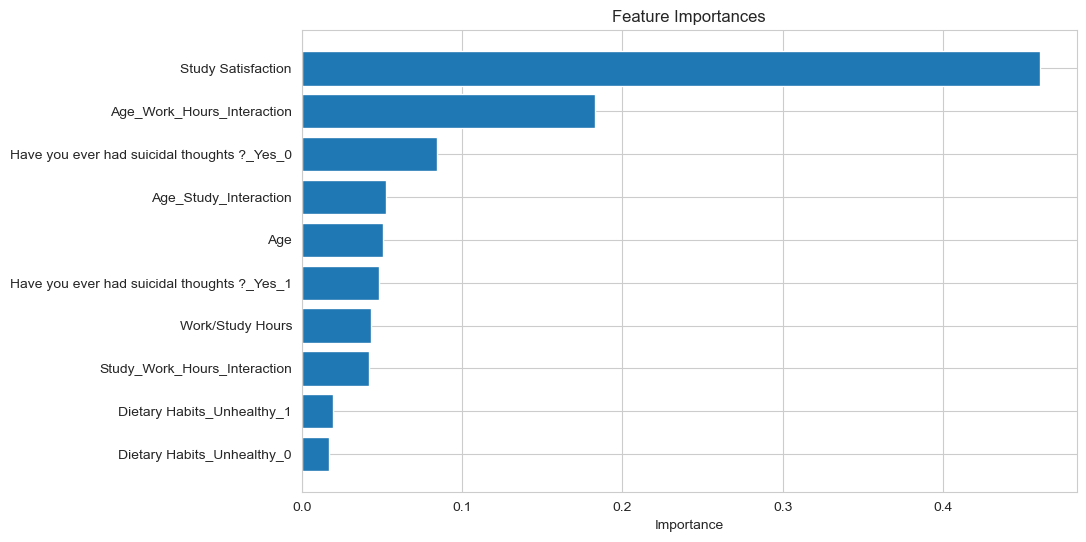

In [67]:
# Create a new dataframe based on df_interaction for modifications
df_copy_2 = df_interaction.copy()

# Convert boolean columns to integers
for col in df_copy_2.select_dtypes(include='bool').columns:
    df_copy_2[col] = df_copy_2[col].astype(int)

# Numerical and categorical columns
numerical_columns = ['Age', 'Work/Study Hours', 'Study Satisfaction',
                     'Age_Study_Interaction', 'Age_Work_Hours_Interaction', 'Study_Work_Hours_Interaction']
categorical_columns = ['Dietary Habits_Unhealthy', 'Have you ever had suicidal thoughts ?_Yes']

# Update column lists to match df_copy_2 structure
numerical_columns = [col for col in numerical_columns if col in df_copy_2.columns]
categorical_columns = [col for col in categorical_columns if col in df_copy_2.columns]

# Print updated column information
print("Updated Numerical Columns:", numerical_columns)
print("Updated Categorical Columns:", categorical_columns)

# Define pipelines for numerical and categorical data
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Standardize numerical features
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine numerical and categorical pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_columns),
    ('cat', cat_pipeline, categorical_columns)
])

# Full pipeline with Random Forest as the model
full_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('random_forest', RandomForestRegressor(n_estimators=200, random_state=42))
])

# Define features and target
X = df_copy_2.drop(columns=['DepressionSeverity'])
y = df_copy_2['DepressionSeverity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
full_pipeline.fit(X_train, y_train)

# Predictions and evaluation
y_pred = full_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Extracting feature importances from the model
rf_model = full_pipeline.named_steps['random_forest']
numerical_features = numerical_columns
if categorical_columns:
    # Extract categorical feature names from the pipeline
    categorical_features = (
        full_pipeline.named_steps['preprocessing']
        .transformers_[1][1]
        .named_steps['onehot']
        .get_feature_names_out(categorical_columns)
    )
else:
    categorical_features = []

# Combine numerical and categorical feature names
all_features = numerical_features + list(categorical_features)
importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top features
print("Top Features by Importance:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.show()

**Conclusion:** The model difference in performance can be explained by the fcat that the model final intercations has slightly biot shifted, allowing easier inetgration at some efficiency benefit

### Conclusion:

This analysis offered valuable business insights into the factors influencing depression severity, providing actionable intelligence for organizations focused on mental health, education, or employee well-being. By identifying key drivers such as Academic Financial Interaction and Study Satisfaction, the analysis highlighted specific areas where targeted support initiatives could be implemented to address mental health challenges. For example, organizations could prioritize financial counseling or academic support services to help alleviate pressures contributing to higher depression severity.

The insights derived from clustering and interaction terms revealed a deeper understanding of how various variables interact, providing a nuanced perspective on how specific demographics or behaviors influence mental health outcomes. These findings can guide policy decisions, resource allocation, and tailored intervention programs for distinct groups, such as students or employees facing high work/study pressure.

This analysis equips decision-makers with data-driven strategies to proactively tackle mental health issues, fostering more supportive environments. By emphasizing critical insights beyond predictive modeling, businesses and institutions can develop impactful solutions that enhance individual well-being and organizational productivity, ultimately contributing to sustainable long-term outcomes.